In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import functions as funs

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)

In [26]:
#Reading in labeled content
labeled_content = pd.read_pickle('data/labeled_content_new.pkl')
labeled_content = pd.DataFrame(labeled_content)

In [27]:
#Transforming the content
X = pd.DataFrame(labeled_content['content'].apply(lambda x: len(x))) #feature
y = labeled_content['type'].apply(lambda x: funs.bin_target(x)) #target

In [28]:
#Split data into 80% training, 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0, shuffle=True)

In [36]:
#baseline_len: logistic regression where x is length of article
baseline_len = LogisticRegression()
baseline_len.fit(X_train, y_train)

y_pred = baseline_len.predict(X_val)
acc = accuracy_score(y_pred,y_val)

print(acc)


0.5976328548341097


evaluating Baseline with length feature
accuracy: 0.6009221189723601
f1: 0.539667744942157
Precision: 0.6023867809057527
Recall: 0.4887774356937134


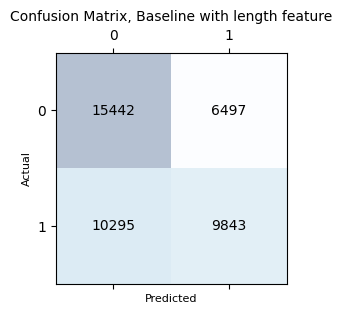

In [30]:
funs.evaluate_and_plot(baseline_len, 'Baseline with length feature', X_test, y_test)

In [58]:
#Reading in LIAR
liar = pd.read_pickle('data/labeled_liar_statements_preprocessed.pkl')
liar = pd.DataFrame(liar)

#Renaming for consistency with training data column names
liar = liar.rename(columns={"Label": "type", "Statement": "content"})

In [59]:
true = set(["half-true", "mostly-true", "barely-true", "true"])
false = set(["false", "pants-fire"])

def get_bin_y_liar(x):
    if x in true:
        return 0
    if x in false:
        return 1

#Transforming true ('reliable' labels) into 0 and false ('fake' labels) into 1
liar["type"] = liar["type"].apply(lambda x: get_bin_y_liar(x))
liar['type'].value_counts()

type
0    9237
1    3554
Name: count, dtype: int64

In [52]:
X_test = pd.DataFrame(liar["content"].apply(lambda x: len(x))) #Feature
y_test = liar["type"] #target

evaluating Baseline_len, LIAR-test
accuracy: 0.27808615432726136
f1: 0.43488372093023253
Precision: 0.277882058501486
Recall: 0.9997186268992684


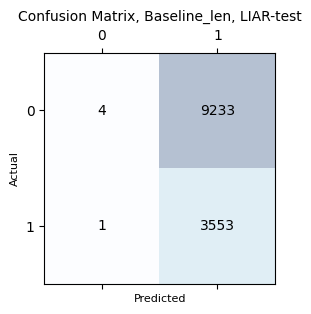

In [53]:
funs.evaluate_and_plot(baseline_len, 'Baseline_len, LIAR-test', X_test, y_test)

In [ ]:
y_pred = baseline_len.predict(X_test)
liar_acc = accuracy_score(y_pred,y_val)

print(acc)

In [ ]:
labeled_content_extd = pd.read_pickle('data/labeled_content_extended_new.pkl')
labeled_content_extd = pd.DataFrame(labeled_content_extd)

In [ ]:
#Tranforming the content with extra scraped data
X = pd.DataFrame(labeled_content_extd['content'].apply(lambda x: len(x))) # feature
y = labeled_content_extd['type'].apply(lambda x: funs.bin_target(x)) #target

In [ ]:
#Split data into 80% training, 10% validation and 10% test
X_train_extd, X_test_extd, y_train_extd, y_test_extd = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
X_val_extd, X_test_extd, y_val_extd, y_test_extd = train_test_split(X_test_extd, y_test_extd, test_size=0.5, random_state=0, shuffle=True)

In [ ]:
#baseline_len_extended: logistic regression where feature is length of article
baseline_len_extended = LogisticRegression()
baseline_len_extended.fit(X_train_extd, y_train_extd)

y_pred_extended = baseline_len_extended.predict(X_val_extd)
acc_extended = accuracy_score(y_val_extd, y_pred_extended)

print(acc_extended)

0.608734507655041
